## Eartquakes' clustering analysis   

In [2]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
df = pd.read_csv('earthquake.csv')
df = df.loc[df['country'].isin(['turkey'])]

In [2]:
df

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24002,2.020000e+13,2017.03.10,12:23:42 AM,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0
24003,2.020000e+13,2017.03.10,12:42:44 AM,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0
24004,2.020000e+13,2017.04.05,12:08:11 AM,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0
24005,2.020000e+13,2017.04.05,12:35:09 AM,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11850 entries, 0 to 24006
Data columns (total 17 columns):
id           11850 non-null float64
date         11850 non-null object
time         11850 non-null object
lat          11850 non-null float64
long         11850 non-null float64
country      11850 non-null object
city         11728 non-null object
area         11735 non-null object
direction    10062 non-null object
dist         10062 non-null float64
depth        11850 non-null float64
xm           11850 non-null float64
md           11850 non-null float64
richter      11850 non-null float64
mw           2156 non-null float64
ms           11850 non-null float64
mb           11850 non-null float64
dtypes: float64(11), object(6)
memory usage: 1.6+ MB


## Univariate Analysis 

In [26]:
numerical_columns = ['dist', 'depth', 'xm', 'md', 'mw','richter']

In [27]:
df[numerical_columns].corr()

,dist,depth,xm,md,mw,richter
dist,1.000000,0.028694,0.004511,-0.004314,-0.011798,0.006295
depth,0.028694,1.000000,0.351884,0.138477,0.302728,0.154677
xm,0.004511,0.351884,1.000000,0.187820,0.794364,0.483123
md,-0.004314,0.138477,0.187820,1.000000,0.616874,-0.255916
mw,-0.011798,0.302728,0.794364,0.616874,1.000000,0.493228
richter,0.006295,0.154677,0.483123,-0.255916,0.493228,1.000000


In [28]:
df[numerical_columns].describe()

,dist,depth,xm,md,mw,richter
count,10062.000000,11850.000000,11850.000000,11850.000000,2156.000000,11850.000000
mean,3.175015,12.794177,3.979249,2.239924,4.459323,1.762540
std,4.715461,16.129368,0.550732,1.993712,1.030654,2.068619
min,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000
25%,1.400000,5.000000,3.600000,0.000000,4.000000,0.000000
50%,2.300000,8.500000,3.800000,3.500000,4.600000,0.000000
75%,3.600000,13.000000,4.200000,3.800000,5.000000,3.900000
max,95.400000,180.000000,7.900000,7.400000,7.700000,7.200000


C:\Users\giamm\Anaconda3.1\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\giamm\Anaconda3.1\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


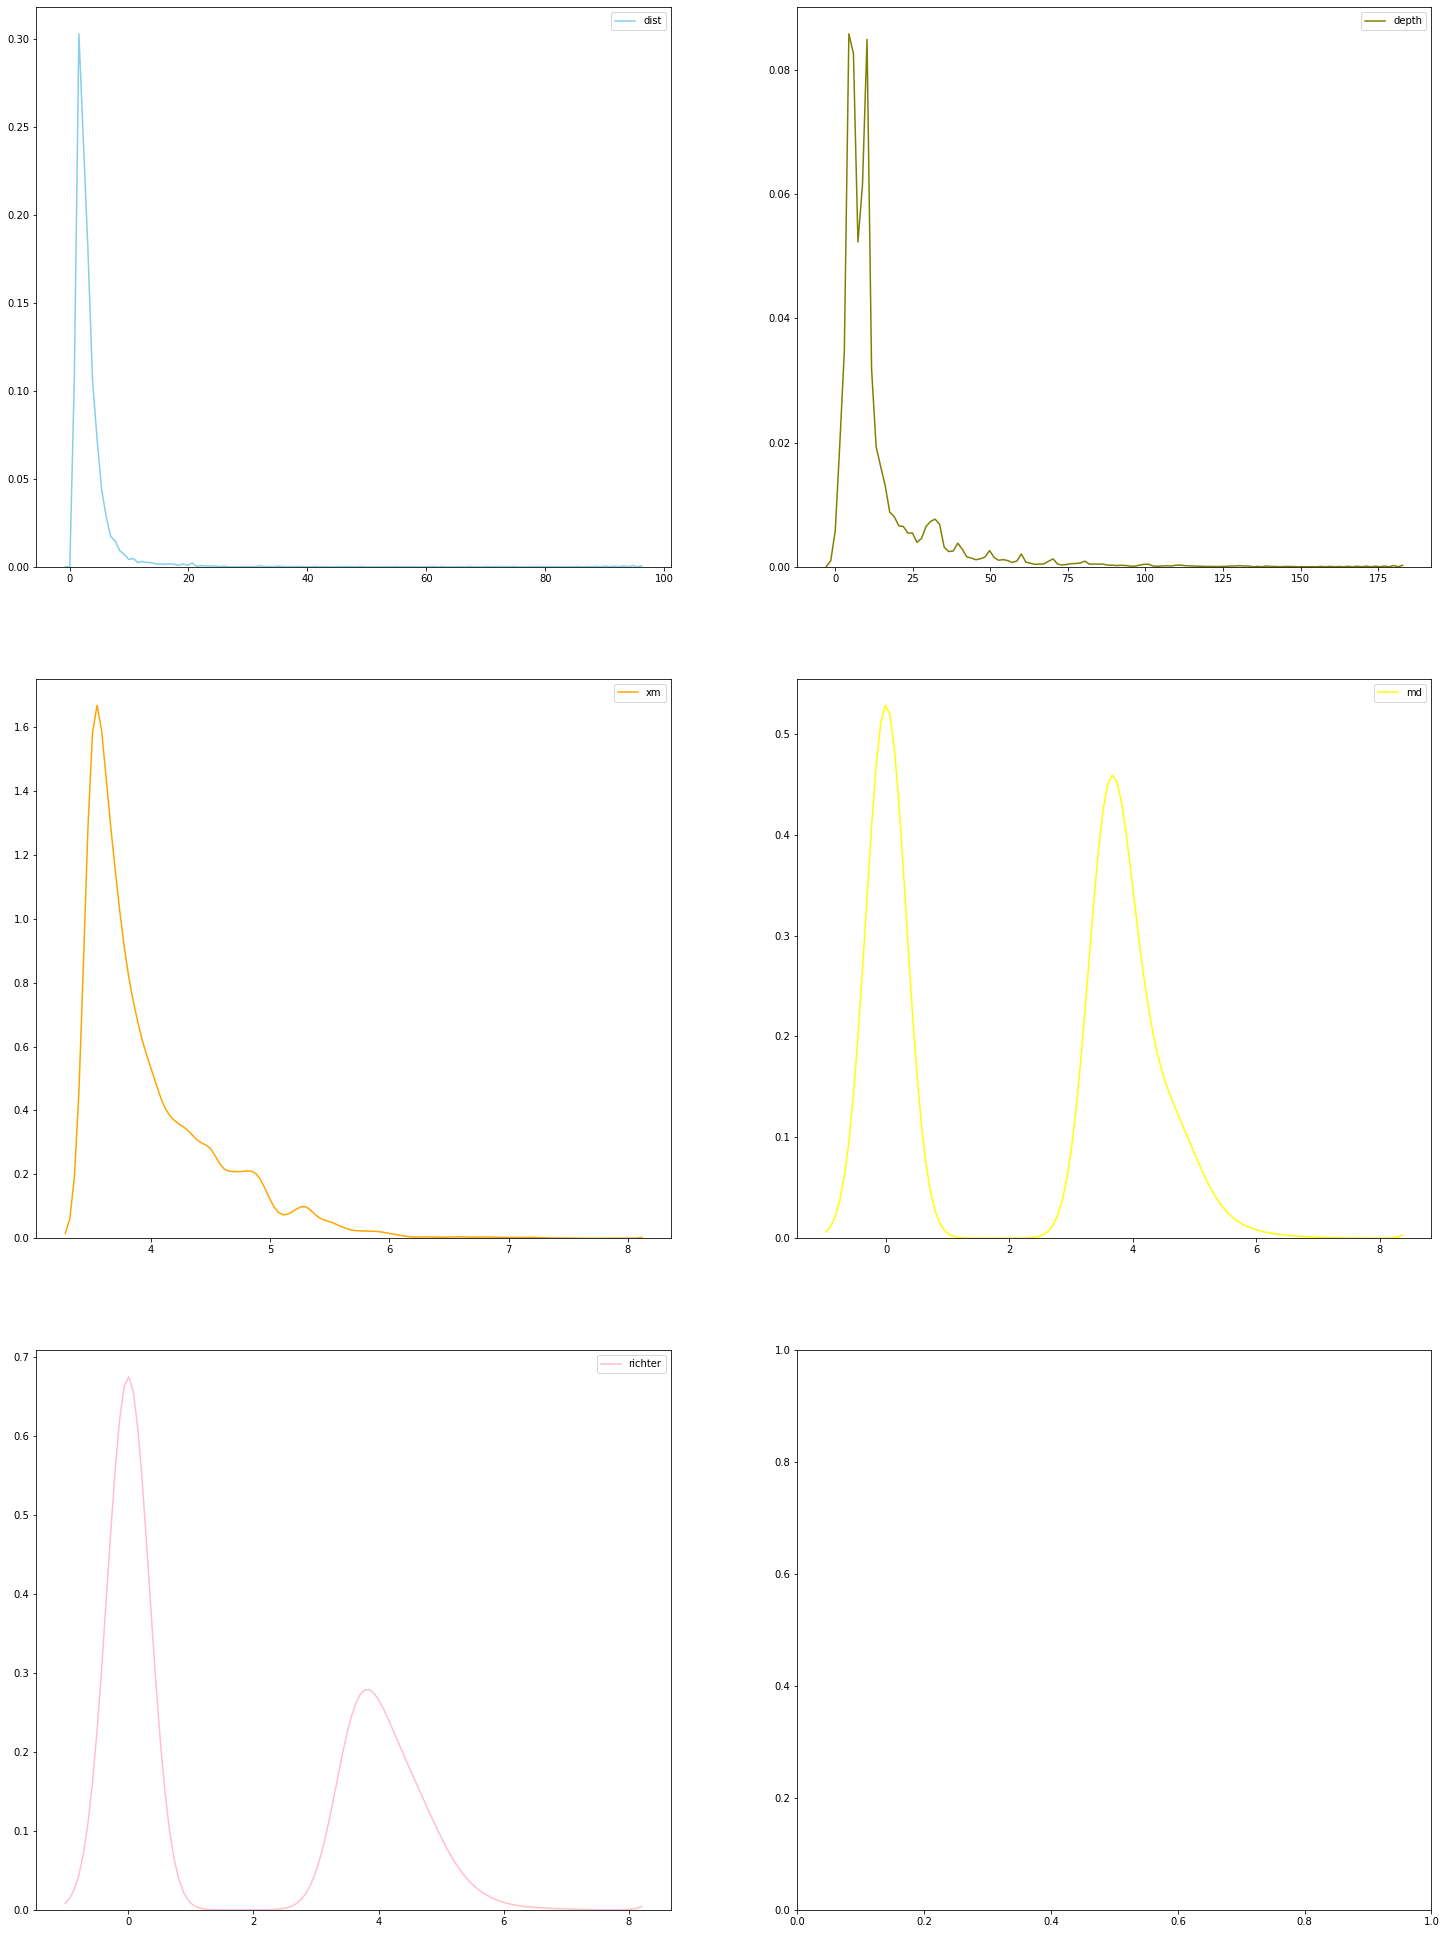

In [29]:
f, axes = plt.subplots(3, 2, figsize=(25,35))
sns.kdeplot(df["dist"] , color="skyblue", ax=axes[0, 0])
sns.kdeplot(df["depth"] , color="olive", ax=axes[0, 1])
sns.kdeplot(df["xm"] , color="orange", ax=axes[1, 0])
sns.kdeplot(df["md"] , color="yellow", ax=axes[1, 1])
sns.kdeplot(df["richter"] , color="pink", ax=axes[2, 0])
#sns.kdeplot(df["time"] , color="red", ax=axes[2, 1])

In [14]:
df_loc = df[['lat','long']]
df_loc = df_loc.dropna()
df_loc_x = df_loc['long']
df_loc_y = df_loc['lat']


colors = np.random.rand(len(df_loc_x))

plt.figure(figsize=(18,20))
plt.scatter(df_loc_x, df_loc_y,c='y', alpha=0.5)
#plt.scatter(39.26, 38.41, s=10, c='b')
plt.show()

In [12]:
df.iat[0,2]

'12:17:44 AM'

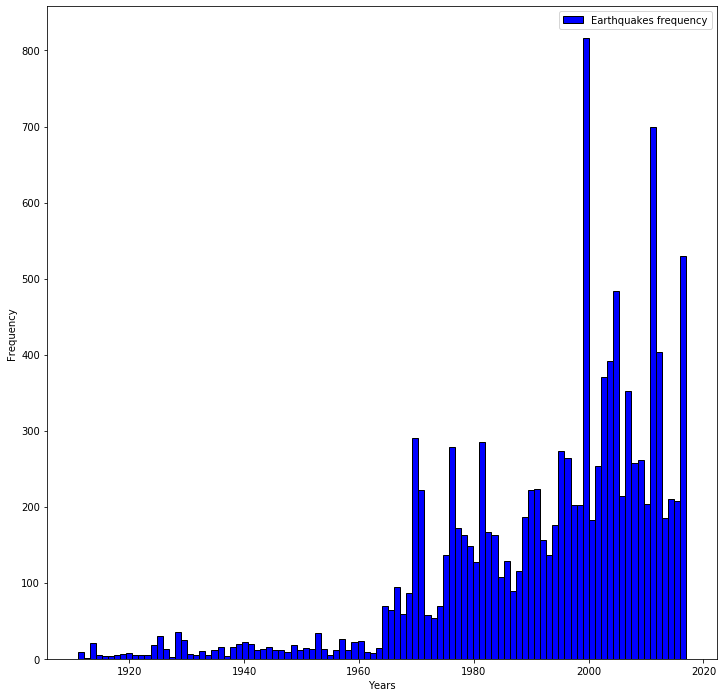

In [3]:
l = list(df['date'])
years = []
for i in l:
    l1 = i.split('.')
    years.append(l1[0])
df['year'] = np.array(years).astype(int)
#df['year'] = data.yeardate.astype(int)
df['year'].plot(kind = "hist" , color = "b" , edgecolor="black", bins = 100 , figsize = (12,12) , label = "Earthquakes frequency")
plt.legend(loc = "upper right")
plt.xlabel("Years")
plt.show()
#df['year'].value_counts()

In [2]:
df['direction'].value_counts()

north_west    2019
south_west    2011
south_east    1917
north_east    1901
south          605
north          576
east           536
west           497
Name: direction, dtype: int64

In [48]:
l = list(df['date'])
years = []
for i in l:
    l1 = i.split('.')
    years.append(l1[0])
df['year'] = np.array(years).astype(int)
df

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,DBSCAN_cluster,Intensity cluster,year
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0,0.0,1,2003
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0,1.0,2,2007
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7,1.0,1,1978
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0,2.0,1,1997
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0,1.0,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24002,2.020000e+13,2017.03.10,12:23:42 AM,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0,NaN,2,2017
24003,2.020000e+13,2017.03.10,12:42:44 AM,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0,NaN,1,2017
24004,2.020000e+13,2017.04.05,12:08:11 AM,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0,NaN,2,2017
24005,2.020000e+13,2017.04.05,12:35:09 AM,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0,NaN,1,2017


In [49]:
df['year_cluster'] = df['year'].apply(lambda x: '10-50' if x<1950 else '50-80' if x>=1950 and x<1980 else '80-00' 
                                      if x>=1980 and x<2000 else '00-017')


,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,DBSCAN_cluster,Intensity cluster,year,year_cluster
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0,0.0,1,2003,00-017
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0,1.0,2,2007,00-017
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7,1.0,1,1978,50-80
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0,2.0,1,1997,80-00
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0,1.0,1,2000,00-017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24002,2.020000e+13,2017.03.10,12:23:42 AM,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0,NaN,2,2017,00-017
24003,2.020000e+13,2017.03.10,12:42:44 AM,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0,NaN,1,2017,00-017
24004,2.020000e+13,2017.04.05,12:08:11 AM,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0,NaN,2,2017,00-017
24005,2.020000e+13,2017.04.05,12:35:09 AM,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0,NaN,1,2017,00-017


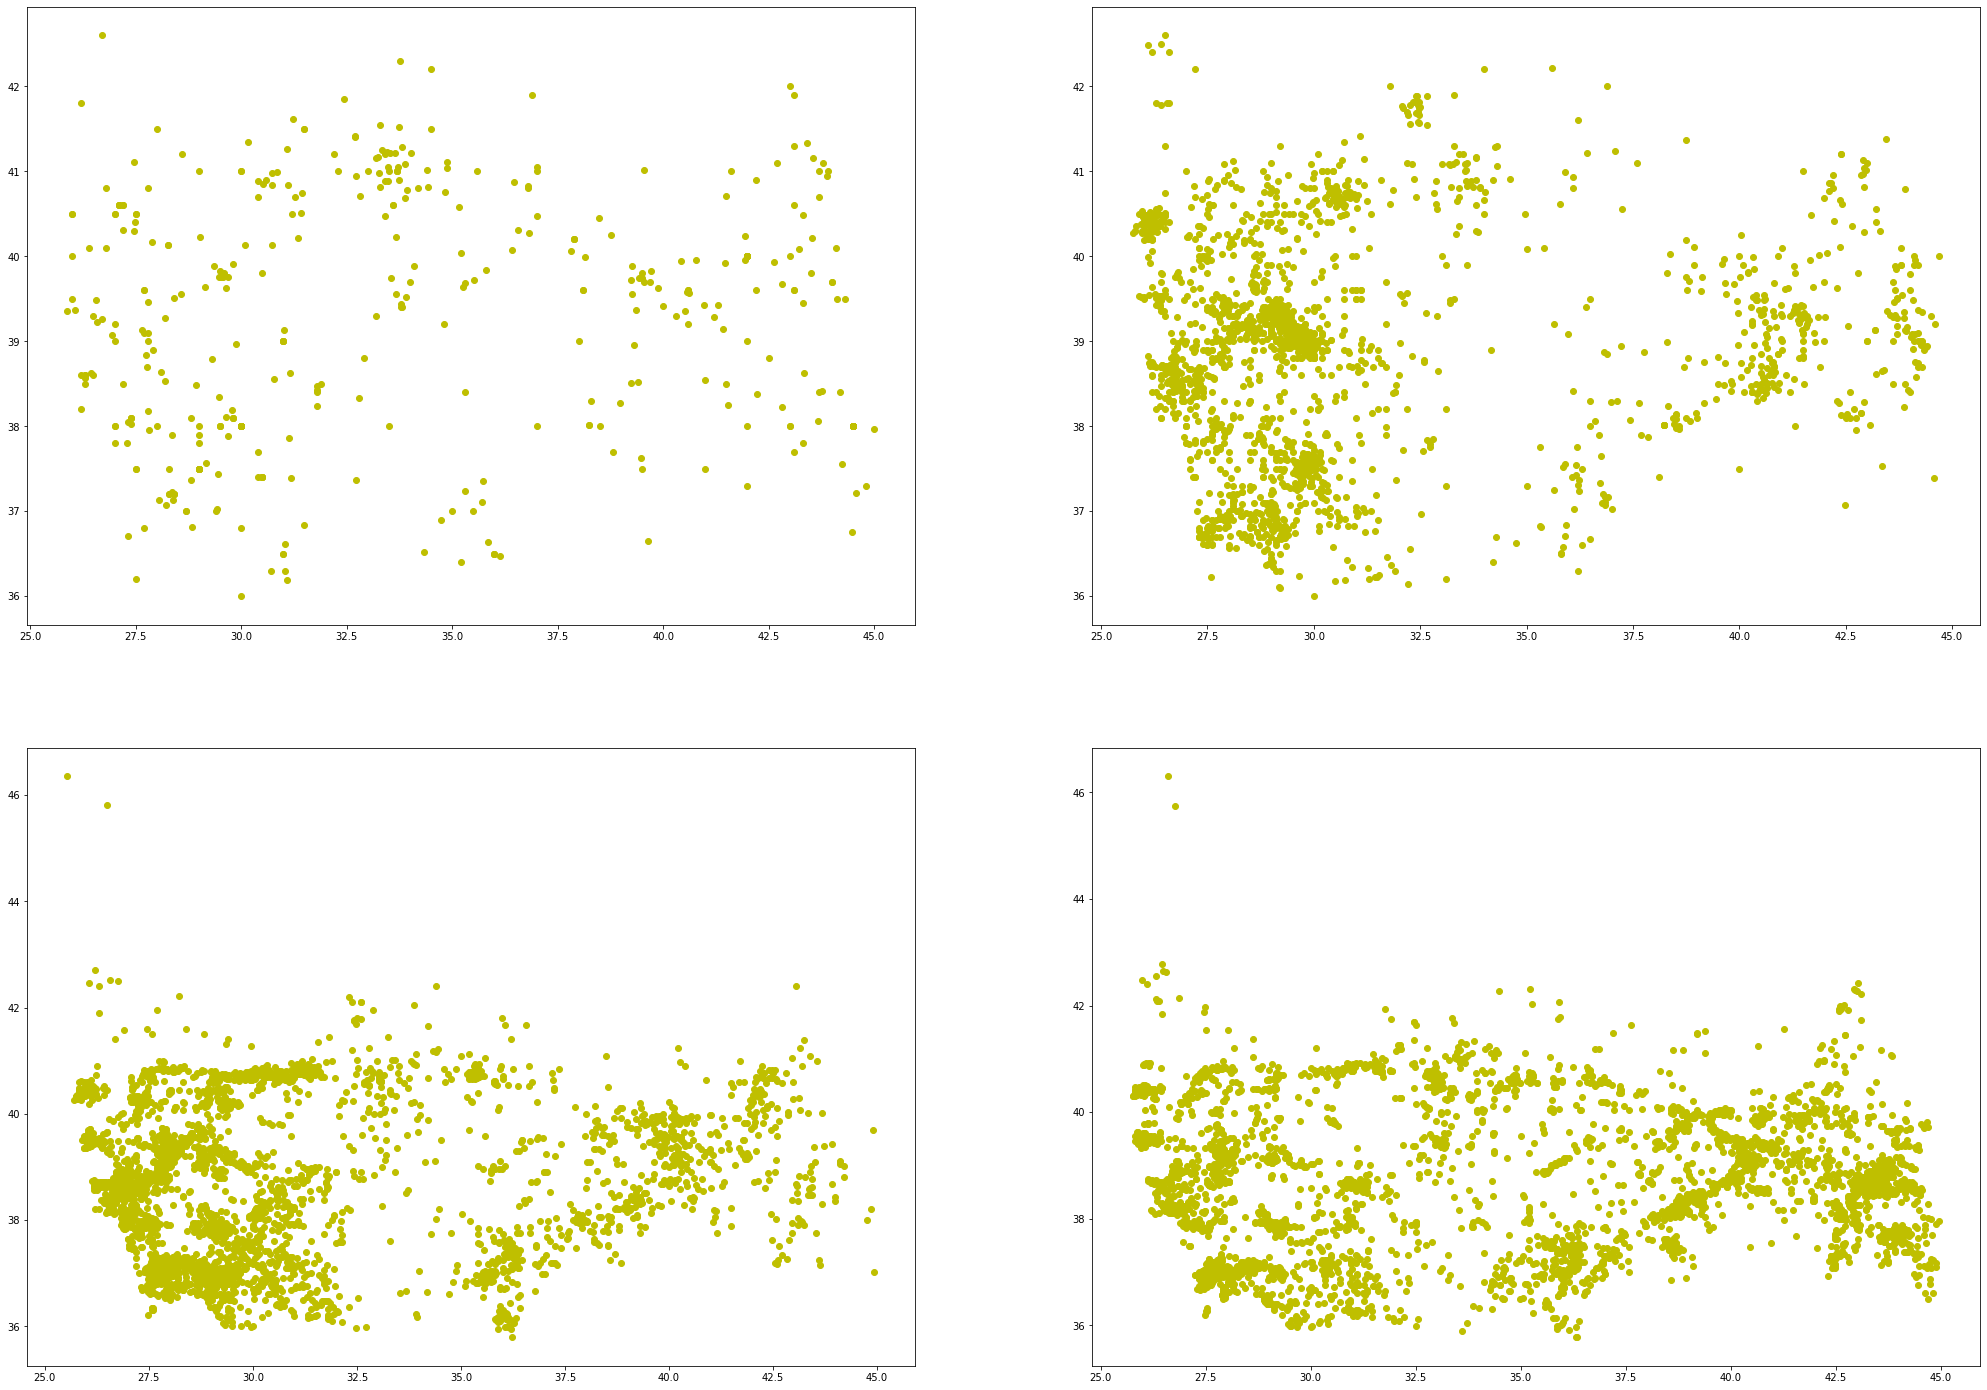

In [57]:
df_loc1 = df.loc[df['year_cluster']=='10-50']
df_loc_x1 = df_loc1['long']
df_loc_y1 = df_loc1['lat']
df_loc2 = df.loc[df['year_cluster']=='50-80']
df_loc_x2 = df_loc2['long']
df_loc_y2 = df_loc2['lat']
df_loc3 = df.loc[df['year_cluster']=='80-00']
df_loc_x3 = df_loc3['long']
df_loc_y3 = df_loc3['lat']
df_loc4 = df.loc[df['year_cluster']=='00-017']
df_loc_x4 = df_loc4['long']
df_loc_y4 = df_loc4['lat']
f, axes = plt.subplots(2, 2, figsize=(35,25))
axes[0,0].scatter(df_loc_x1, df_loc_y1,c='y')
axes[0,1].scatter(df_loc_x2, df_loc_y2,c='y')
axes[1,0].scatter(df_loc_x3, df_loc_y3,c='y')
axes[1,1].scatter(df_loc_x4, df_loc_y4,c='y')

plt.show()


In [10]:
export_df2 = df.to_csv(r'C:\Users\giamm\Desktop\export_df.csv', index = None, header=True)

In [8]:
import statistics
statistics.mean(df['long'])

30.77322905819136

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [33]:
def k_means(X, n_components = 0, scale = False, verbose = False, df = df, **km_params): 
    if scale:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        
    dopca = n_components is None or n_components > 0
    
    if dopca:
            pca = PCA(n_components = n_components)
            X = pca.fit_transform(X)

    km = KMeans(**km_params)
    km.fit(X)
    #score = purity(df, km.labels_, verbose)
    
    return km

In [34]:
df_clusters = df[['lat','long']]
X = df_clusters.as_matrix()
kmeans = k_means(X,n_clusters=10, init='random', n_init=80, max_iter=1200, random_state=0)
centroids = kmeans.cluster_centers_
centroids_x = []
centroids_y = []
for i in centroids:
    centroids_x.append(i[0])
    centroids_y.append(i[1])
centroids

C:\Users\giamm\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[37.29435858, 35.90126739],
       [40.42477032, 33.63355713],
       [37.08677654, 28.57253631],
       [37.63206655, 30.73218039],
       [38.7001787 , 43.42158685],
       [40.29911868, 26.69443008],
       [38.80973316, 38.45100381],
       [39.81777047, 29.57907352],
       [38.63353777, 27.27382182],
       [39.45321582, 40.77748065]])

C:\Users\giamm\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


Text(0.5, 1.0, 'K-Means Clustering')

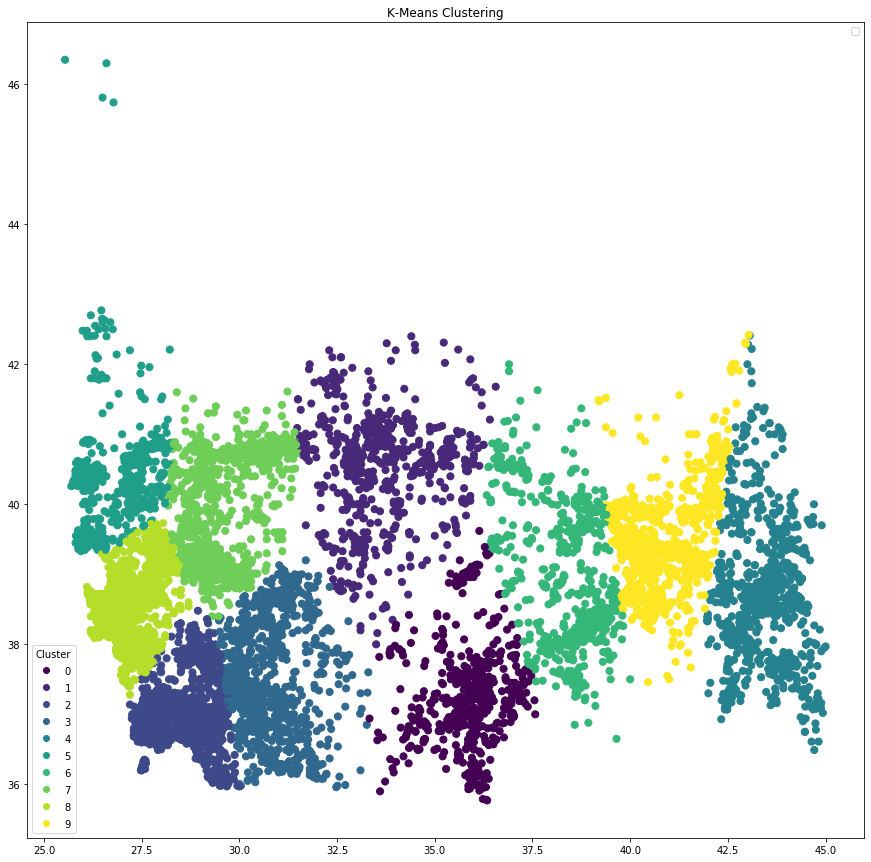

In [35]:
labels = pd.DataFrame(kmeans.labels_)
#X = pd.DataFrame(X)
df_clusters['cluster'] = labels
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
scatter = ax.scatter(df['long'],df['lat'], c=labels[0], s=50)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Cluster")
ax.add_artist(legend1)
ax.legend()
ax.set_title('K-Means Clustering')
#ax.set_xlabel('Long')
#ax.set_ylabel('Lat')
#plt.colorbar(scatter)

In [36]:
df['k_means_cluster'] = df_clusters['cluster']

In [37]:
df

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,year,k_means_cluster
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0,2003,9.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0,2007,7.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7,1978,8.0
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0,1997,6.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0,2000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24002,2.020000e+13,2017.03.10,12:23:42 AM,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0,2017,NaN
24003,2.020000e+13,2017.03.10,12:42:44 AM,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0,2017,NaN
24004,2.020000e+13,2017.04.05,12:08:11 AM,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0,2017,NaN
24005,2.020000e+13,2017.04.05,12:35:09 AM,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0,2017,NaN


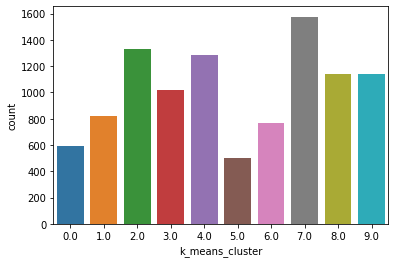

In [38]:
sns.countplot(df['k_means_cluster'])

In [12]:
df['Intensity cluster'] = df['richter'].apply(lambda x: 1 if x <4 else 2 if x>=4 and x<6 else 3)
df

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,DBSCAN_cluster,Intensity cluster
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0,0.0,1
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0,1.0,2
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7,1.0,1
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0,2.0,1
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24002,2.020000e+13,2017.03.10,12:23:42 AM,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0,NaN,2
24003,2.020000e+13,2017.03.10,12:42:44 AM,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0,NaN,1
24004,2.020000e+13,2017.04.05,12:08:11 AM,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0,NaN,2
24005,2.020000e+13,2017.04.05,12:35:09 AM,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0,NaN,1


Intensity cluster,1,2,3
k_means_cluster,,,
0.0,0.845763,0.154237,0.000000
1.0,0.798289,0.195599,0.006112
2.0,0.793544,0.204204,0.002252
3.0,0.792157,0.206863,0.000980
4.0,0.729247,0.269201,0.001552
5.0,0.683367,0.308617,0.008016
6.0,0.804178,0.193211,0.002611
7.0,0.704949,0.290609,0.004442
8.0,0.776512,0.216477,0.007011


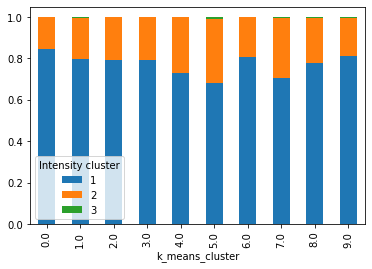

In [41]:
tab = pd.crosstab(df['k_means_cluster'],df['Intensity cluster'])
tab1 = tab.div(tab.sum(1).astype(float), axis=0)
tab1.plot(kind="bar", stacked=True)
tab1

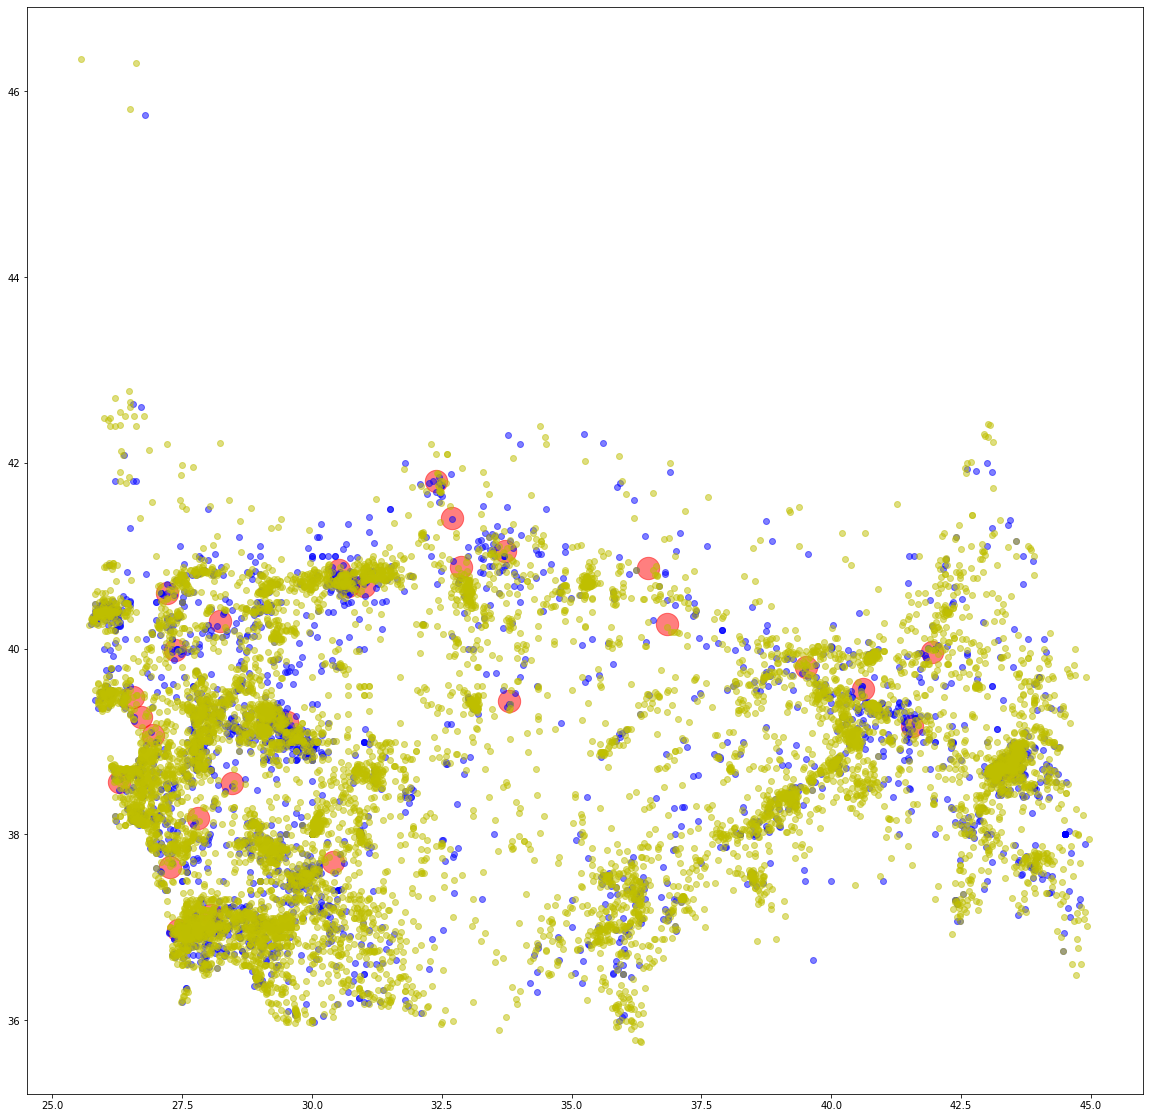

No handles with labels found to put in legend.


Text(0.5, 1, 'Intensity Clustering')

In [42]:
df_loc = df[['lat','long']]
df_loc_x = df_loc['long']
df_loc_y = df_loc['lat']
colors = np.random.rand(len(df_loc_x))
plt.figure(figsize=(20,20))
#plt.scatter(df_loc_x, df_loc_y,c='y', alpha=0.5)
peaks = df.loc[df['richter'] > 6]
plt.scatter(peaks['long'], peaks['lat'], s=500, c='r',marker='o',  alpha=0.5)
meds = df.loc[df['Intensity cluster']==2]
plt.scatter(meds['long'], meds['lat'], c='b', alpha=0.5)
lows = df.loc[df['richter'] < 4]
plt.scatter(lows['long'], lows['lat'], c='y', alpha=0.5)
plt.show()
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Intensity Cluster")
ax.add_artist(legend1)
ax.legend()
ax.set_title('Intensity Clustering')

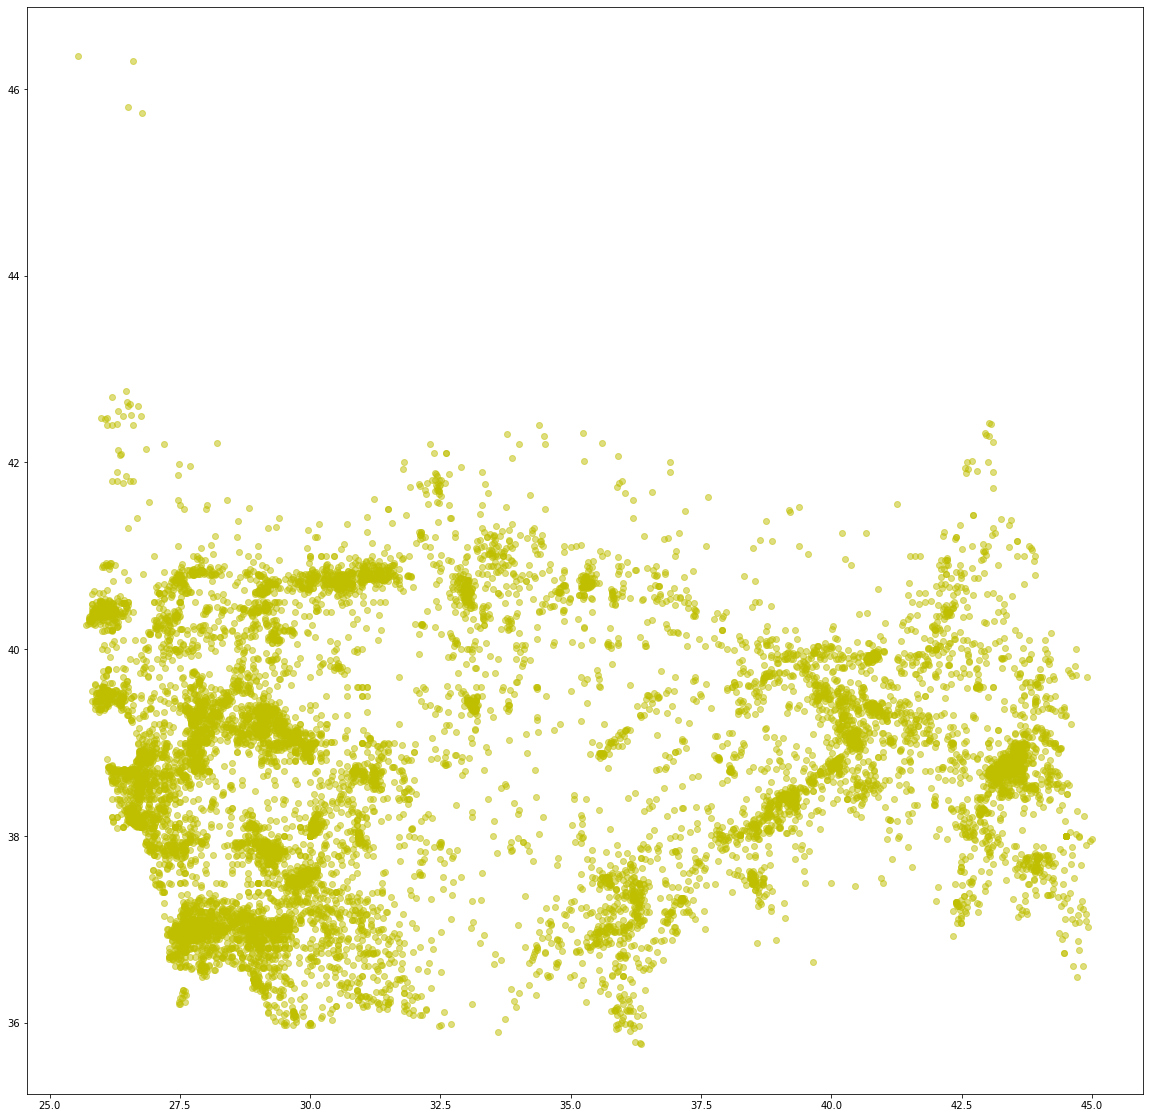

In [5]:
df_loc = df[['lat','long']]
df_loc_x = df_loc['long']
df_loc_y = df_loc['lat']
colors = np.random.rand(len(df_loc_x))
plt.figure(figsize=(20,20))
plt.scatter(df_loc_x, df_loc_y,c='y', alpha=0.5)

In [22]:
df_clusters = df[['lat','long']]
X = df_clusters.as_matrix()

C:\Users\giamm\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [5]:
from sklearn.cluster import DBSCAN 

In [6]:
def dbscan_clustering(X, n_components = None, scale = False, df = df, **dbscan_params): 
    if scale:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        
    dopca = n_components is None or n_components > 0
    
    if dopca:
            pca = PCA(n_components= None, copy=True, whiten=False, svd_solver='auto', 
                      tol=0.0, iterated_power='auto', random_state=None)
            X = pca.fit_transform(X)

    db = DBSCAN(**dbscan_params)
    #metrics: sqeuclidean, chebyshev, cosine
    db.fit(X)
    #score = purity(df, db.labels_)
   
    
    return db

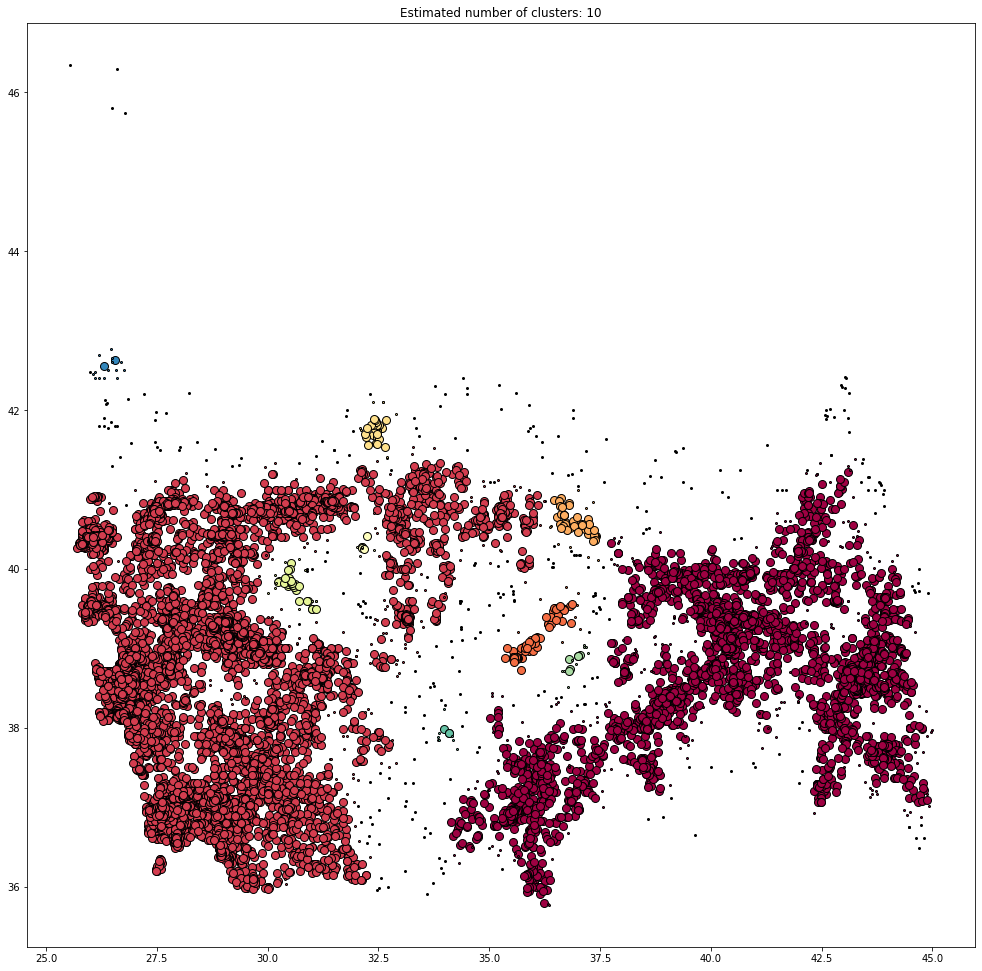

[(0, (0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)),
 (1, (0.8310649750096117, 0.23844675124951936, 0.30880430603613995, 1.0)),
 (2, (0.9568627450980393, 0.42745098039215684, 0.2627450980392157, 1.0)),
 (3, (0.9914648212226067, 0.677354863514033, 0.37808535178777386, 1.0)),
 (4, (0.996078431372549, 0.8784313725490196, 0.5450980392156862, 1.0)),
 (5, (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0)),
 (6, (0.9019607843137256, 0.9607843137254902, 0.5960784313725491, 1.0)),
 (7, (0.6652825836216842, 0.8645905420991927, 0.6432141484044599, 1.0)),
 (8, (0.4, 0.7607843137254902, 0.6470588235294118, 1.0)),
 (9, (0.19946174548250672, 0.5289504036908881, 0.7391003460207612, 1.0)),
 (-1, [0, 0, 0, 1])]

In [47]:
# Black removed and is used for noise instead.
db = DBSCAN(eps=0.27, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
unique_labels = set(labels)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(17,17))
#fig.add_subplot(111)
legend=[]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=2)
    
    legend.append((k,col))

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
legend

In [24]:
labels = pd.DataFrame(db.labels_)
#df_clusters['cluster'] = labels
df['DBSCAN_cluster'] = labels
df

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,DBSCAN_cluster,Intensity cluster
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0,0.0,1
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0,1.0,2
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7,1.0,1
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0,2.0,1
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24002,2.020000e+13,2017.03.10,12:23:42 AM,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0,NaN,2
24003,2.020000e+13,2017.03.10,12:42:44 AM,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0,NaN,1
24004,2.020000e+13,2017.04.05,12:08:11 AM,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0,NaN,2
24005,2.020000e+13,2017.04.05,12:35:09 AM,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0,NaN,1


 1.0    6165
 0.0    3515
-1.0     257
 2.0      69
 3.0      46
 6.0      38
 4.0      30
 9.0      16
 7.0      15
 8.0      11
 5.0      10
Name: DBSCAN_cluster, dtype: int64

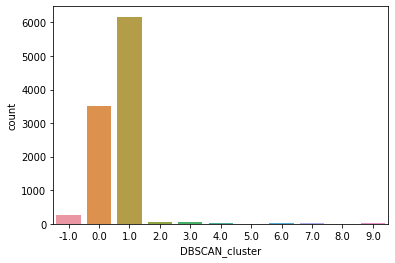

In [25]:
sns.countplot(df['DBSCAN_cluster'])
df['DBSCAN_cluster'].value_counts()

Intensity cluster,1,2,3
DBSCAN_cluster,,,
-1.0,0.735409,0.264591,0.000000
0.0,0.788051,0.209957,0.001991
1.0,0.761233,0.234712,0.004055
2.0,0.898551,0.101449,0.000000
3.0,0.717391,0.239130,0.043478
4.0,0.500000,0.433333,0.066667
5.0,0.900000,0.100000,0.000000
6.0,0.789474,0.184211,0.026316
7.0,0.800000,0.200000,0.000000


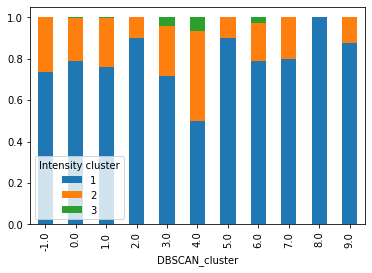

In [26]:
tab = pd.crosstab(df['DBSCAN_cluster'],df['Intensity cluster'])
tab1 = tab.div(tab.sum(1).astype(float), axis=0)
tab1.plot(kind="bar", stacked=True)
tab1

C:\Users\giamm\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\giamm\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


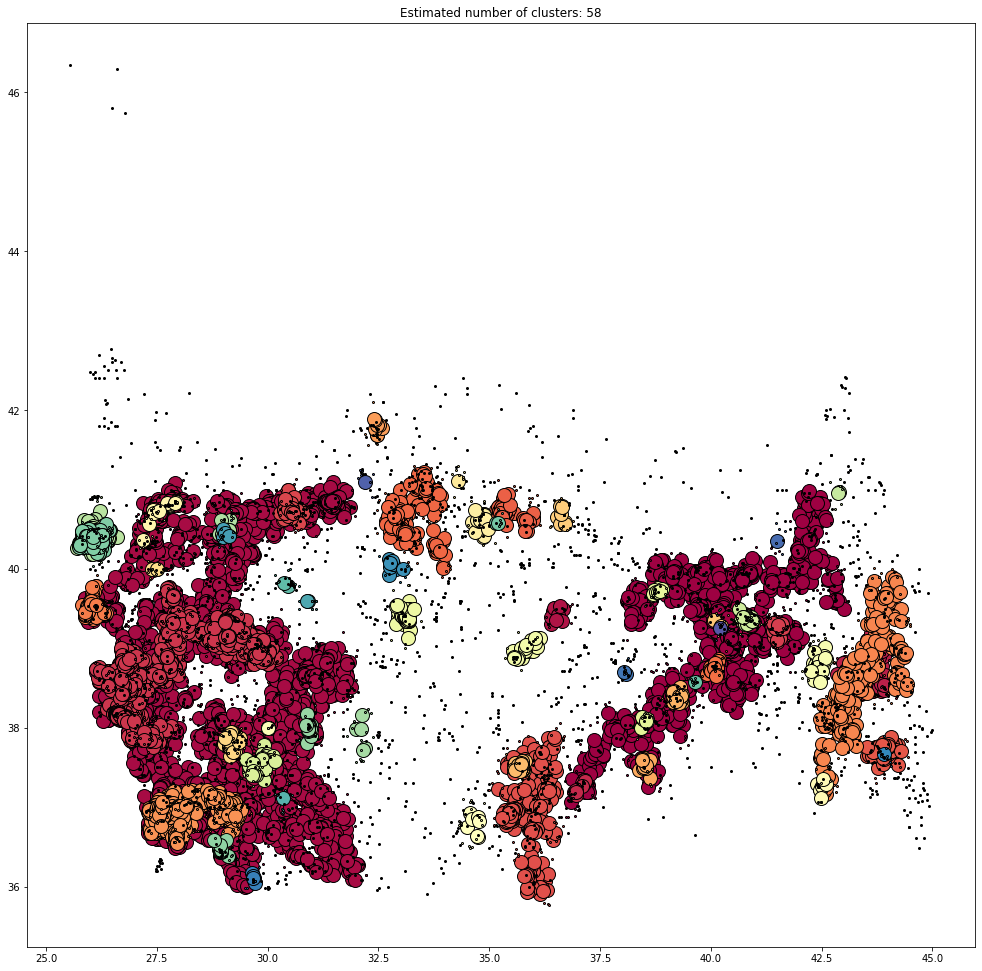

In [19]:
X = df[['richter', 'lat','long']].as_matrix()
#X = df.loc[df['DBSCAN_cluster'] == 1.0]
X1 = df[['lat', 'long']]
#X = X[['richter']].as_matrix()
X1 = X1.as_matrix()
db = DBSCAN(eps=0.25, min_samples=10).fit(X) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
unique_labels = set(labels)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(17,17))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=2)


plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [9]:
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
len(db.core_sample_indices_)

23424

Further analyses can be implemented, for example, methods for estimating the probability of occurrence of earthquakes in different regions. 